In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset-csv/placement-dataset.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [3]:
r_dataset = pd.read_csv("/kaggle/input/placement-dataset-csv/placement-dataset.csv")
r_dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
r_dataset = pd.read_csv("/kaggle/input/placement-dataset-csv/placement-dataset.csv")
dataset = r_dataset.drop(columns=["Unnamed: 0"])
dataset

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


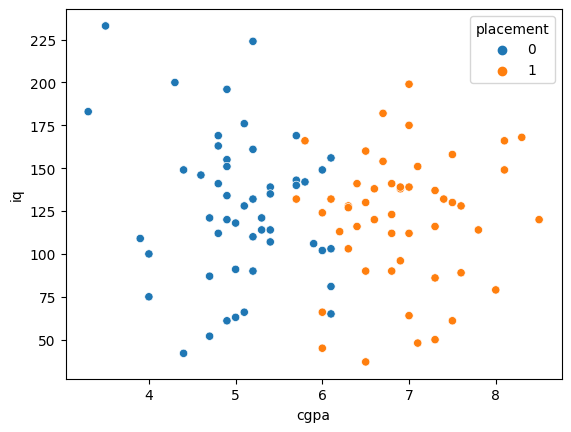

In [5]:
sns.scatterplot(x="cgpa",y="iq",data=dataset,hue="placement")
plt.show()

In [6]:
x = dataset.iloc[:,:-1]
y = dataset["placement"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
pr = Perceptron(alpha=0.0001)
pr

Perceptron()

In [11]:
x.ndim

2

In [12]:
pr.fit(x_train,y_train)

Perceptron()

In [13]:
pr.score(x_train,y_train)*100 , pr.score(x_test,y_test)*100

(50.0, 50.0)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


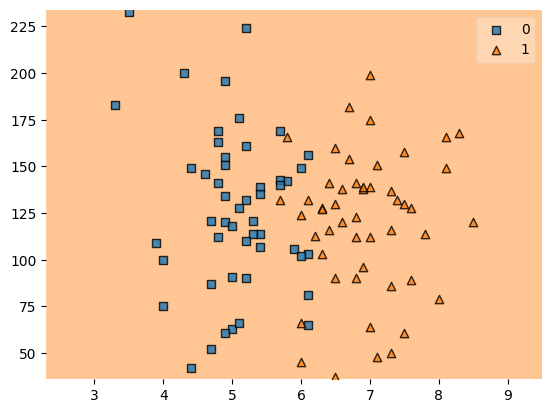

In [14]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=pr)
plt.show()